In [27]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
import warnings

In [4]:
train = pd.read_csv('train.csv')
train.head()


,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
0,MI,36,510,0,0,0,193.08,88,35.56,228.34,109,26.68,200.51,126,10.03,12.54,6,3.27,1,0
1,TN,16,510,0,0,0,165.62,69,30.50,246.13,95,28.76,150.08,99,7.51,12.30,9,3.21,1,0
2,DC,99,415,0,0,0,216.22,70,39.83,115.62,110,13.51,236.66,87,11.84,13.11,2,3.42,3,0
3,WY,159,510,0,0,0,182.16,85,33.56,218.48,126,25.54,201.62,133,10.08,9.32,2,2.43,1,0
4,NJ,77,510,0,0,0,134.16,98,24.72,230.27,139,26.92,244.35,140,12.22,15.76,3,4.11,0,0


In [5]:
print('Shape of Train Data: ', train.shape)

Shape of Train Data:  (3467, 20)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              3467 non-null   object 
 1   Account_Length_Months   3467 non-null   int64  
 2   Area_Code               3467 non-null   int64  
 3   Intl_Plan               3467 non-null   int64  
 4   VM_Plan                 3467 non-null   int64  
 5   VM_Messages             3467 non-null   int64  
 6   Avg_Day_Minutes         3467 non-null   float64
 7   Avg_Day_Calls           3467 non-null   int64  
 8   Avg_Day_Charge          3467 non-null   float64
 9   Avg_Eve_Minutes         3467 non-null   float64
 10  Avg_Eve_Calls           3467 non-null   int64  
 11  Avg_Eve_Charge          3467 non-null   float64
 12  Avg_Night_Minutes       3467 non-null   float64
 13  Avg_Night_Calls         3467 non-null   int64  
 14  Avg_Night_Charge        3467 non-null   

In [7]:
# Convert dtype of categorical columns
cat_cols = ['State_Code','Area_Code','Intl_Plan','VM_Plan','Churn']

train[cat_cols] = train[cat_cols].astype('category')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State_Code              3467 non-null   category
 1   Account_Length_Months   3467 non-null   int64   
 2   Area_Code               3467 non-null   category
 3   Intl_Plan               3467 non-null   category
 4   VM_Plan                 3467 non-null   category
 5   VM_Messages             3467 non-null   int64   
 6   Avg_Day_Minutes         3467 non-null   float64 
 7   Avg_Day_Calls           3467 non-null   int64   
 8   Avg_Day_Charge          3467 non-null   float64 
 9   Avg_Eve_Minutes         3467 non-null   float64 
 10  Avg_Eve_Calls           3467 non-null   int64   
 11  Avg_Eve_Charge          3467 non-null   float64 
 12  Avg_Night_Minutes       3467 non-null   float64 
 13  Avg_Night_Calls         3467 non-null   int64   
 14  Avg_Night_Charge        

In [8]:
# Check for missing values

train.isna().sum()


State_Code                0
Account_Length_Months     0
Area_Code                 0
Intl_Plan                 0
VM_Plan                   0
VM_Messages               0
Avg_Day_Minutes           0
Avg_Day_Calls             0
Avg_Day_Charge            0
Avg_Eve_Minutes           0
Avg_Eve_Calls             0
Avg_Eve_Charge            0
Avg_Night_Minutes         0
Avg_Night_Calls           0
Avg_Night_Charge          0
Avg_Intl_Minutes          0
Avg_Intl_Calls            0
Avg_Intl_Charge           0
Customer_Service_Calls    0
Churn                     0
dtype: int64

In [ ]:
#Analysis the distribution of customer demographics such as state,
#area,international plan, voicemail plan, Target Variable

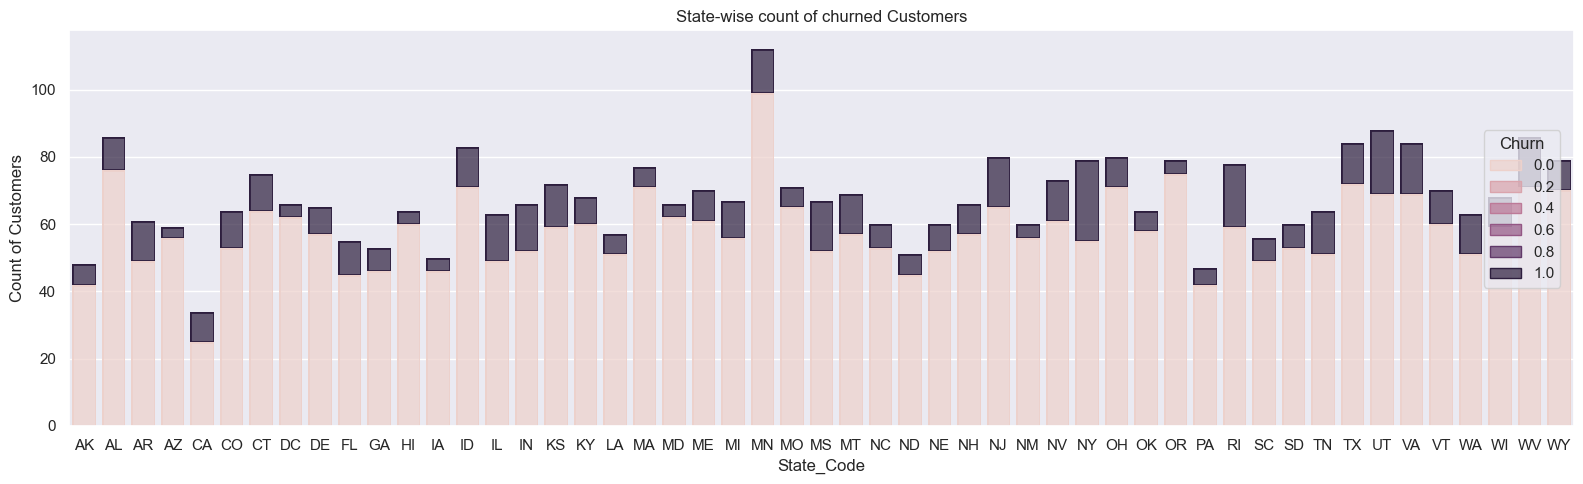

In [9]:
warnings.filterwarnings("ignore", category=FutureWarning) #to make the overall experience better
#State wise churn distribution
p = (
    so.Plot(train, x='State_Code', color='Churn')
    .add(so.Bar(), so.Count(), so.Stack())
    .layout(size=(16,5))
    .label(title="State-wise count of churned Customers",y="Count of Customers")
)

p.show()

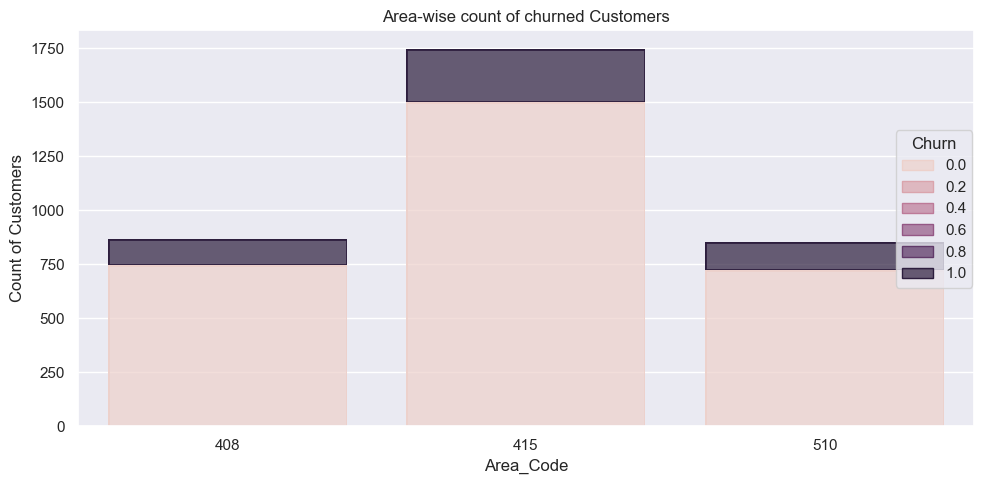

In [10]:
#Are
p = (
    so.Plot(train, x='Area_Code', color='Churn')
    .add(so.Bar(), so.Count(), so.Stack())
    .layout(size=(10,5))
    .label(title="Area-wise count of churned Customers",y="Count of Customers")
)

p.show()

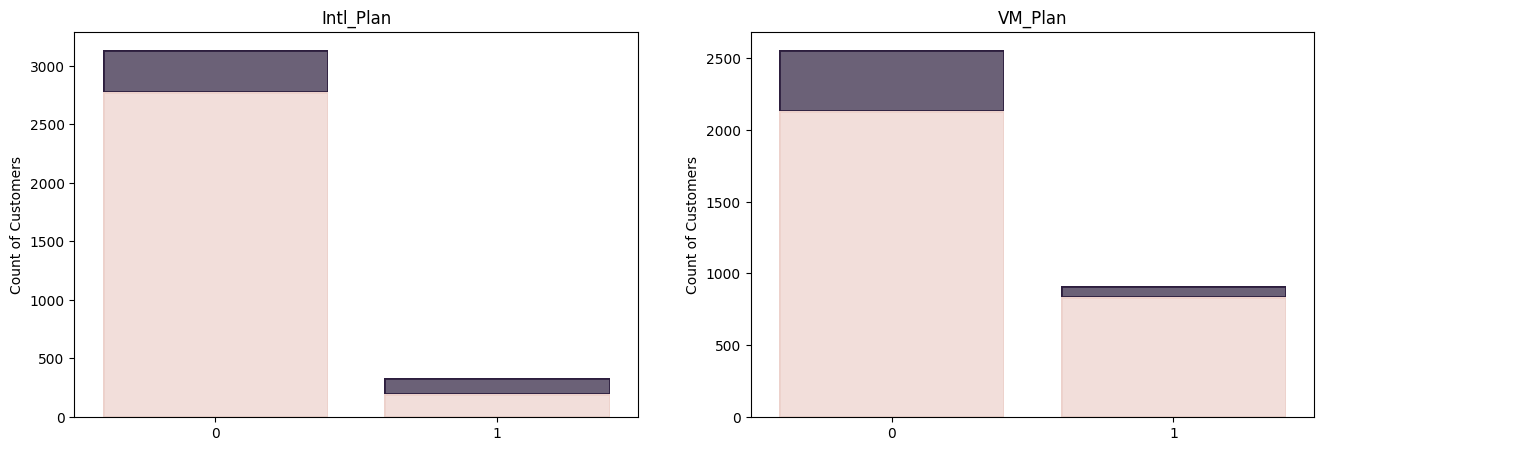

In [11]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

for col,subplot in zip(cat_cols[2:-1], ax.flatten()):
    f = (
        so.Plot(train, x=col, color='Churn')
        .add(so.Bar(), so.Count(), so.Stack())
        .label(x=" ", y="Count of Customers", title=col)
        .on(subplot).plot()
    )
    
plt.show()

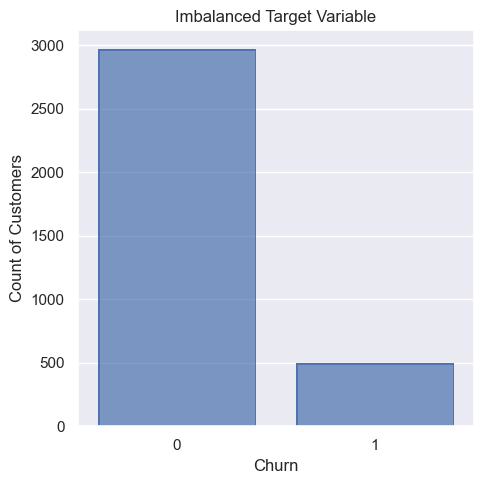

In [12]:
p = (
    so.Plot(train, x='Churn')
    .add(so.Bar(),so.Count())
    .layout(size=(5,5))
    .label(title="Imbalanced Target Variable",y="Count of Customers")
)

p.show()

In [ ]:
#correlation analysis to identify any strong predictors

In [13]:
#Creating column to contain all int and float datatypes
num_cols = train.select_dtypes(include=['int','float']).columns


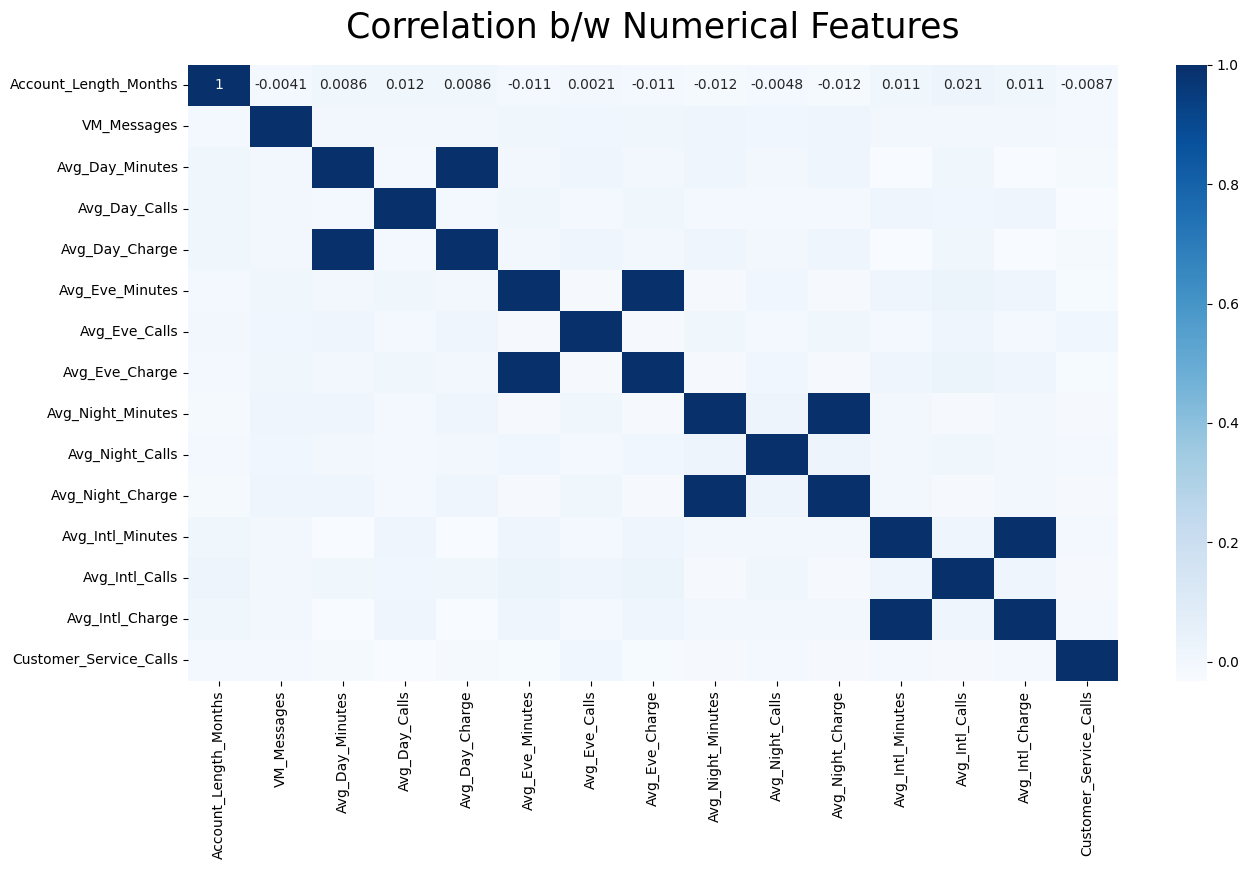

In [14]:
table = train[num_cols].corr()
plt.figure(figsize=[15,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

In [15]:
train.drop(columns= ['State_Code', 'Area_Code'], inplace= True)

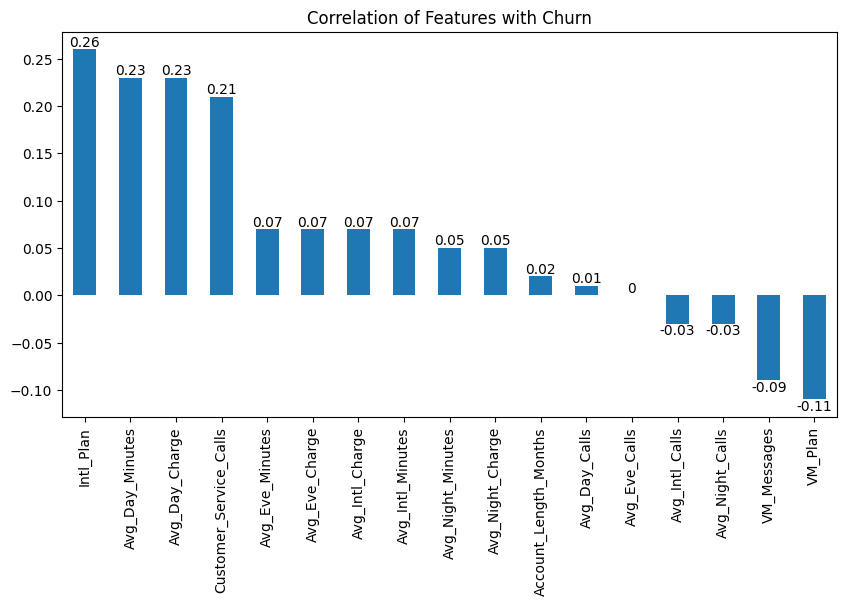

In [16]:
p = round(train.corr()['Churn'].sort_values(ascending=False)[1:],2).plot(kind='bar', figsize=(10,5))
p.bar_label(p.containers[0])
plt.title('Correlation of Features with Churn')
plt.show()

In [143]:
#Exploratory Data Analysis (EDA) to identify patterns and
#factors that are indicative of customer churn

In [17]:
#Check for outliers
num_cols = train.select_dtypes(include=['int','float']).columns
i = ['tr'+str(n) for n in range(1,16)]


In [18]:
# Replace outliers with median

def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        
        median = df[col].median()
        
        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])
        
replace_outliers(train, num_cols)


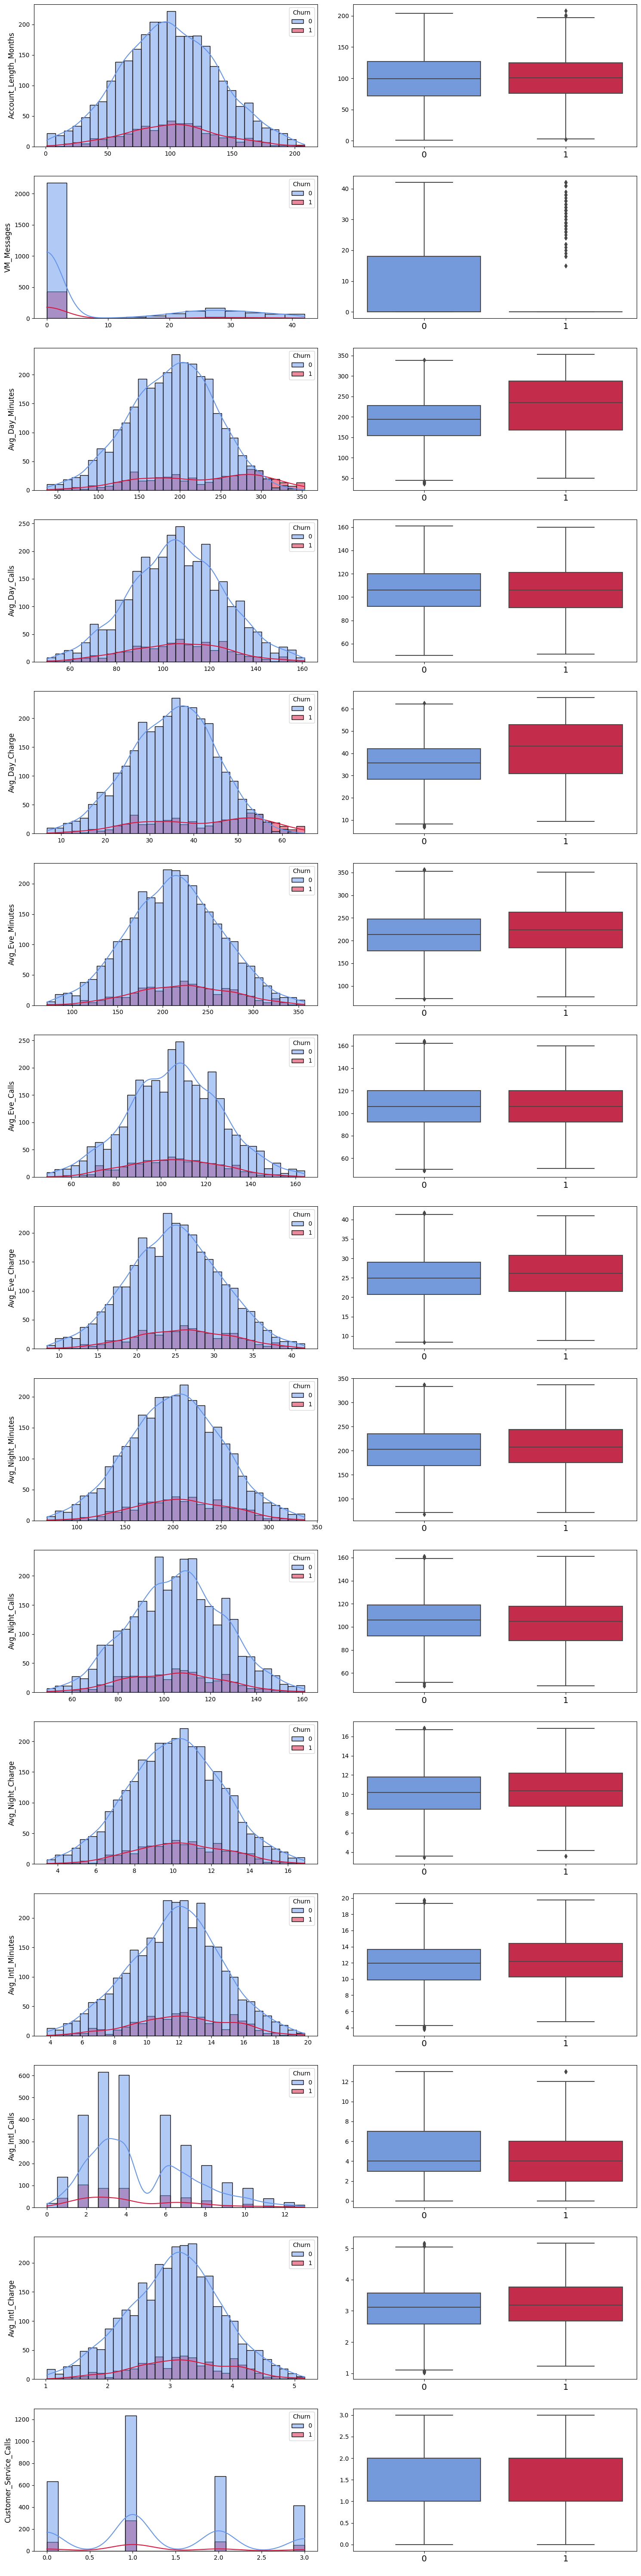

In [19]:
# Visualising impact of Numeric Columns on Churn after replacing outliers

#warnings.filterwarnings("ignore", category=FutureWarning)
fig, ax = plt.subplots(15,2,figsize=(15,60))
i=0
color_dict = {0: matplotlib.colors.to_rgba('cornflowerblue', 0.3),
              1: matplotlib.colors.to_rgba('crimson', 1)}
for col in num_cols:
    sns.histplot(data=train, x=col, hue='Churn', ax=ax[i, 0], legend=True, 
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=train, y=col, x='Churn', ax=ax[i,1], 
               palette=('cornflowerblue', 'crimson'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()


In [ ]:
#Scaling 

In [20]:
num_cols = train.select_dtypes(include=[float, int]).columns
cat_cols = ['Intl_Plan','VM_Plan']
scaler=StandardScaler()
scaled_cols = scaler.fit_transform(train[num_cols])
train_scaled=pd.DataFrame(scaled_cols, columns=num_cols)
train_scaled[cat_cols] = train[cat_cols]
train_scaled.head()   

,Account_Length_Months,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Intl_Plan,VM_Plan
0,-1.647085,-0.554396,-0.044421,-0.889458,-0.044906,0.266664,0.144425,0.265031,-0.057501,1.018869,-0.056901,0.242145,0.498872,0.238700,-0.303562,0,0
1,-2.162233,-0.554396,-0.524252,-1.821964,-0.524928,0.610491,-0.533011,0.608961,-1.092111,-0.307907,-1.090596,0.159643,1.643791,0.159545,-0.303562,0,0
2,-0.024368,-0.554396,0.359924,-1.772885,0.360171,-1.911873,0.192813,-1.912642,0.684144,-0.897586,0.685555,0.438086,-1.027686,0.436586,1.818314,0,0
3,1.521077,-0.554396,-0.235235,-1.036696,-0.234638,0.076100,0.967026,0.076531,-0.034728,1.362848,-0.036391,-0.864751,-1.027686,-0.869462,-0.303562,0,0
4,-0.591031,-0.554396,-1.073979,-0.398665,-1.073253,0.303965,1.596073,0.304715,0.841910,1.706828,0.841429,1.349040,-0.646046,1.346862,-1.364501,0,0


In [30]:
#machine learning model to predict churn

In [21]:
x= train_scaled
x[cat_cols] = x[cat_cols].astype(int)
y = pd.Series(train['Churn'])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=43)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2426, 17), (1041, 17), (2426,), (1041,))

In [23]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')

print('{}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 
0.9365994236311239


In [24]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 
0.8655139289145053
